In [1]:
!ls

Untitled.ipynb                lab
jupyter_nbconvert_config.json migrated
jupyter_notebook_config.json  nbconfig
jupyter_notebook_config.py


In [3]:
!wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip

--2019-08-14 11:19:26--  https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91078102 (87M) [application/zip]
Saving to: ‘nyc_taxi.zip’

nyc_taxi.zip        100%[===================>]  86.86M  1.46MB/s    in 2m 9s   

2019-08-14 11:21:40 (687 KB/s) - ‘nyc_taxi.zip’ saved [91078102/91078102]



In [4]:
!unzip nyc_taxi.zip

Archive:  nyc_taxi.zip
   creating: data/
  inflating: data/nyc_data.csv       
  inflating: data/nyc_fare.csv       


In [10]:
# library

In [38]:
pip install numpy pandas matplotlib

You are using pip version 19.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Data EDA

In [41]:
data_file = 'data/nyc_data.csv'
data = pd.read_csv(data_file, parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [42]:
data.shape

(846945, 14)

In [43]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 14 columns):
medallion             846945 non-null object
hack_license          846945 non-null object
vendor_id             846945 non-null object
rate_code             846945 non-null int64
store_and_fwd_flag    424577 non-null object
pickup_datetime       846945 non-null datetime64[ns]
dropoff_datetime      846945 non-null datetime64[ns]
passenger_count       846945 non-null int64
trip_time_in_secs     846945 non-null int64
trip_distance         846945 non-null float64
pickup_longitude      846945 non-null float64
pickup_latitude       846945 non-null float64
dropoff_longitude     846945 non-null float64
dropoff_latitude      846945 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 90.5+ MB


In [45]:
data.describe

<bound method NDFrame.describe of                                medallion                      hack_license  \
0       76942C3205E17D7E7FE5A9F709D16434  25BA06A87905667AA1FE5990E33F0E2E   
1       517C6B330DBB3F055D007B07512628B3  2C19FBEE1A6E05612EFE4C958C14BC7F   
2       ED15611F168E41B33619C83D900FE266  754AEBD7C80DA17BA1D81D89FB6F4D1D   
3       B33E704CC189E80C9671230C16527BBC  6789C77E1CBDC850C450D72204702976   
4       BD5CC6A22D05EB2D5C8235526A2A4276  5E8F2C93B5220A922699FEBAFC2F7A54   
5       61E558C4FCB0BCB8562FC37B06B97FFE  76DC5E351A0E646679BCA84B18B37B9A   
6       36EDC01D57A6489E2DEE50734ECB327D  35E93075DA51FFDEFA6B3FA0C49A0C70   
7       131162C7685521FA81608D3C42E4EF29  A1C3B89CD387ABD20F337A2DA15F88D7   
8       22467390B5CCC51FD1B12659F6084B2F  12EED5AC20F50C538A3C9F3270A63EFA   
9       939D5E5E9555C02F0DB5B4B4F2D6BCBC  0413E28D43093EFA4044A8D30B84DAF6   
10      1C5F0E003DD46B10FD994E4F324CB976  90903E9E4577BDED080692E8BBCBC2B4   
11      6C04634A9482DAF6D72A6D

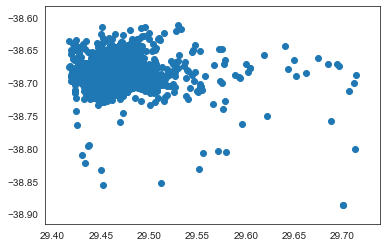

In [46]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

def lat_lng_to_pixels(lat, lng):
  lat_rad = lat * np.pi / 180.0
  lat_rad - np.log(np.tan((lat_rad + np.pi/2.0)/2.0))
  x = 100*(lng+180.0)/360.0
  y = 100*(lat_rad - np.pi) / (2.0*np.pi)
  return (x, y)

px, py = lat_lng_to_pixels(p_lat, p_lng)
plt.scatter(px, py)

(-38.68, -38.67)

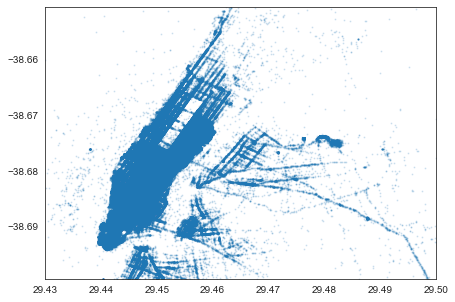

In [47]:
plt.figure(figsize=(7,5))
plt.scatter(px, py, s=1, alpha=0.14)
plt.axis('equal')
plt.xlim(29.43, 29.50)
plt.ylim(-38.68, -38.67)
# plt.axis('off')